# Data Visualization

***Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.***

### Examples of methods to visualize data

- Area Chart
- Bar Chart
- Box-and-whisker Plots
- Bubble Cloud
- Heat Map
- Histogram
- Scatter Plot (2D or 3D)
- Pie chart

### The Library are used for Data Visualization

- Matplotlib
- Seaborn 
- Pandas

## Matplotlib: Standard Python Visualization Library<a id="10"></a>


> [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

## Seaborn Library
> [Seaborn](https://seaborn.pydata.org/index.html#) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

> Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

# pandas
> [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language.

### Parts of a Figure
***Here are the components of a Matplotlib Figure.***

<img src = https://matplotlib.org/stable/_images/anatomy.png  width =350>

In [275]:
# import library 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
data = pd.read_excel('Canada_data.xlsx')  
data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [277]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [278]:
# print the dimensions of the dataframe
print(data.shape)

(196, 43)


In [279]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
data.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
data.columns = list(map(str, data.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
data.set_index('Country', inplace=True)

# add total column
data['Total'] = data.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', data.shape)

data dimensions: (196, 38)


### Line Pots

***What is a line plot and why use it?***

- A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


- In **Matplotlib** we can create a line plot by calling the `plot` method. We can also plot multiple columns in a single graph, by looping through the columns we want and plotting each column on the same axis.


- To create a line plot in **Pandas**, we can call `<dataframe>.plot.line()`. While in Matplotlib we needed to loop over every column we wanted to plot, in Pandas we don't need to do that because it automatically plots all available numeric columns (at least if we don't define a specific column/s).


- To create a line plot in **Seaborn**, the `sns.lineplot` method can be used. The only argument required is the data, which in our case is the four numeric columns from the Iris dataset. We can also use the `sns.kdeplot` method which goes around the edges of the curves, so it's much cleaner if you have a lot of outliers in your dataset.




### 1. Matplotlib library

In [280]:
haiti = data.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

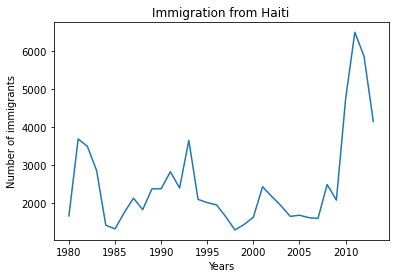

In [281]:
####################################### Line Plot using Matplotlib #########################################
# create x,y data
x_data = haiti.index.map(int)
y_data = haiti.values
plt.plot(x_data, y_data)
# set title 
plt.title('Immigration from Haiti')
# set y label
plt.ylabel('Number of immigrants')
# set x label
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure

### 2. Seaborn library

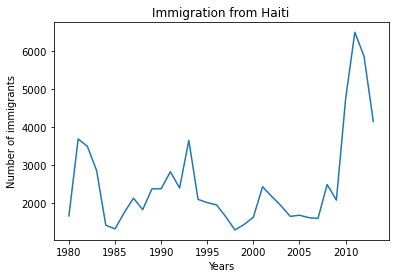

In [282]:
x = data[years].loc['Haiti'].index.map(int)
y = data[years].loc['Haiti'].values
sns.lineplot(x = x ,y = y )

plt.title('Immigration from Haiti')
# set y label
plt.ylabel('Number of immigrants')
# set x label
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

### 3. Pandas library

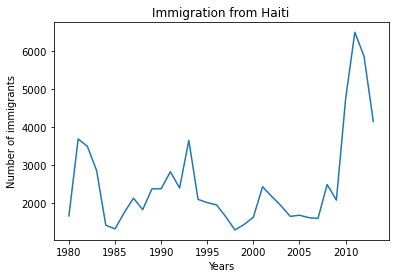

In [283]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')
# set title 
plt.title('Immigration from Haiti')
# set y label
plt.ylabel('Number of immigrants')
# set x label
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure


## Histogram Plot

- A histogram is a graphical representation that organizes a group of data points into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.


- In **Matplotlib** we can create a Histogram using the `hist` method. If we pass it categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.


- In **Pandas**, we can create a Histogram with the `plot.hist` method. There aren’t any required arguments but we can optionally pass some like the bin size.


- To create a histogram in **Seaborn**, we use the `sns.distplot` method. We need to pass it in the column we want to plot and iit will calculate the occurrences itself. We can also pass the number of bins to it.

### 1. Matplotlib library

Text(0, 0.5, 'Country Frequency')

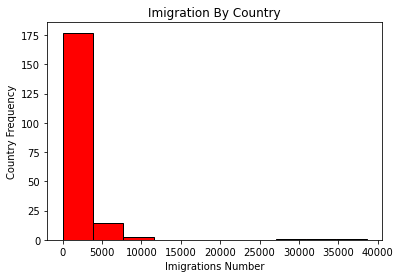

In [284]:
####################################### Histogram Plot using Matplotlib #########################################
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['2010'], edgecolor="black", color="r", orientation='vertical',)
# set title and labels
ax.set_title('Imigration By Country')
ax.set_xlabel('Imigrations Number')
ax.set_ylabel('Country Frequency')

In [285]:
# plt.hist(data['2010'].sort_values(ascending = True))

### 2. Seaborn library

C:\Users\sulaiman_noursy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Country Frequency')

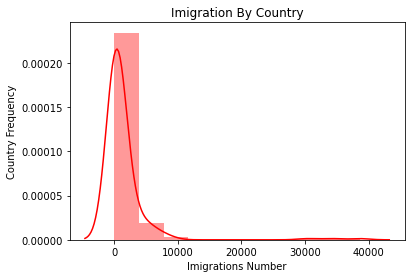

In [286]:
####################################### Histogram Plot using Seaborn #########################################
fig, ax = plt.subplots()
sns.distplot(data['2010'], bins=10, kde=True, color='r', ax = ax)
ax.set_title('Imigration By Country')
ax.set_xlabel('Imigrations Number')
ax.set_ylabel('Country Frequency')

### 3. Pandas library

Text(0, 0.5, 'Country Frequency')

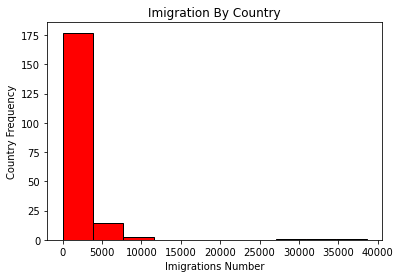

In [287]:
#################################### Histogram Plot using Pandas visualization #####################################
# create figure and axis
fig, ax = plt.subplots()
ax = data['2010'].plot.hist(edgecolor="black", color="r")
ax.set_title('Imigration By Country')
ax.set_xlabel('Imigrations Number')
ax.set_ylabel('Country Frequency')

In [288]:
data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


### Bar Plot
- A bar chart can be created in Matplotlib using the bar method. The bar chart does not automatically calculate the frequency of a category, so we will use the pandas value_counts function to do this. A bar chart is useful for categorical data that doesn't have a lot of different categories (less than 30) because otherwise it can get very cluttered.


- To plot a bar-chart in Pandas we can use the plot.bar() method, but before we can call this we need to get our data. For this we will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.


- In Seaborn, a bar chart can be created using the sns.countplot method and pass data to it.

### 1. Matplotlib library

In [289]:
# data.reset_index()

Text(0, 0.5, 'Frequency')

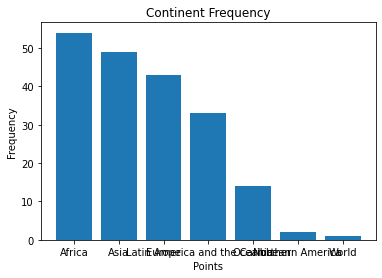

In [290]:
####################################### Bar Plot using Matplotlib #########################################

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
result = data['Continent'].value_counts()
# get x and y data 
points = result.index 
frequency = result.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Continent Frequency')
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')


### 2. Seaborn library

Text(0, 0.5, 'Frequency')

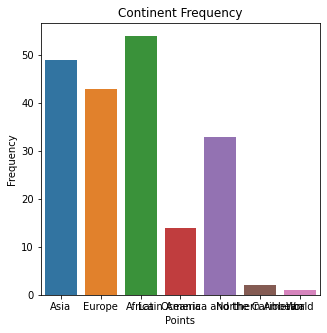

In [291]:
a4_dims = (5,5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x = data['Continent'])
# set title and labels 
ax.set_title('Continent Frequency')
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

### 3. Pandas library

Text(0, 0.5, 'Frequency')

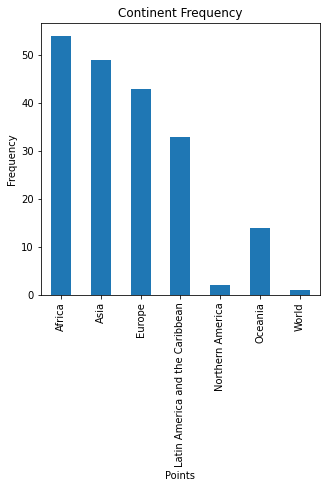

In [292]:
#################################### Bar Plot using Pandas visualization #####################################
a4_dims = (5,5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = data['Continent'].value_counts().sort_index().plot.bar()
# set title and labels 
ax.set_title('Continent Frequency')
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

### Pie Plot
- Matplotlib has pie() function in its pyplot module which create a pie chart representing the data in an array.


- To plot a pie-chart in Pandas we can use the plot.pie() method, but before we can call this we need to get our data. For this we will first group by the occurrences using the groupby() method and then select one column and get it's sum using sum() method.

### 1. Matplotlib library

Text(0, 0.5, 'Imigration Total')

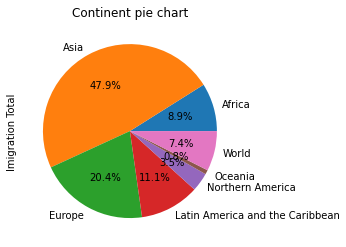

In [293]:
####################################### Pie Plot using Matplotlib #########################################

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
dat = data.groupby("Continent")["Total"].sum()
# get x and y data 
points = dat.index 
frequency = dat.values
# create bar chart 
ax.pie(frequency, labels= points, autopct="%.1f%%") 
# set title and labels 
ax.set_title('Continent pie chart')
ax.set_ylabel('Imigration Total')

### 2. Pandas library

Text(17.200000000000017, 0.5, 'Imigration Total')

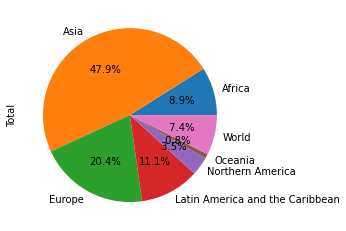

In [294]:
#################################### Pie Plot using Pandas visualization #######################################

#groupby the data by delivery type
dat = data.groupby("Continent")["Total"].sum()
dat.plot.pie(autopct="%4.1f%%");
# set title and labels 
ax.set_title('Continent pie chart')
ax.set_ylabel('Imigration Total')

In [296]:
data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [298]:
data[years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
Zambia,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59


### Scatter Plot

### 1. Matplotlib library

Text(0, 0.5, 'Imigration Total')

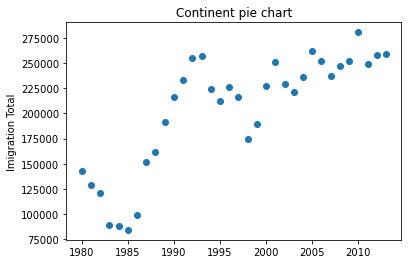

In [331]:
####################################### scatter Plot using Matplotlib #########################################

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
dat = data[years].sum(axis = 0)
# get x and y data 
X_axis = dat.index.map(int).tolist()
y_axis = dat.values.tolist()
# create bar chart 
plt.scatter(X_axis, y_axis)
# set title and labels 
ax.set_title('Years vs Total')
ax.set_ylabel('Imigration Years')
ax.set_ylabel('Imigration Total per Years')